### IMPORTING REQUIRED LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math 
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr
import statsmodels.api as sm

In [5]:
import warnings
warnings.filterwarnings('ignore')

### DATA

In [6]:
df = pd.read_csv(r'C:\Users\SAIFULLA SHARIEF\Desktop\MY PROJECTS\BANK - LOGISTIC REGRESSION\bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.isnull().sum().sum()

0

* No Null values in dataframe

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### Heat Map for null values

<AxesSubplot:>

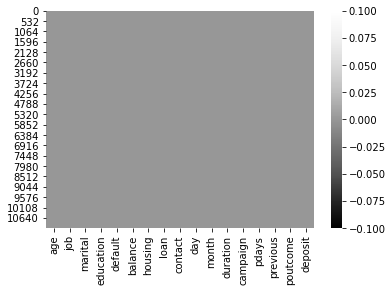

In [11]:
sns.heatmap(df.isnull(), cmap = 'Greys_r')

### TARGET VARIABLE : DEPOSIT (Categorical)

In [12]:
df.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [13]:
df.deposit.value_counts().sum()

11162

In [14]:
df.deposit.describe()

count     11162
unique        2
top          no
freq       5873
Name: deposit, dtype: object

* Converting Object type dtype to int64

* Replacing 'no' with 0 and 'yes' with 1

In [15]:
df.deposit.replace(to_replace=['no', 'yes'], value=[0, 1],inplace = True)

In [16]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

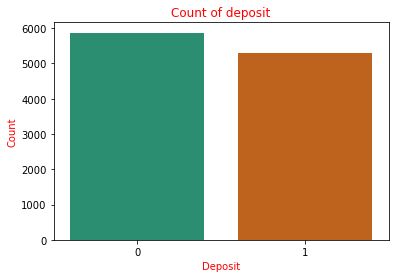

In [17]:
sns.countplot(df.deposit,palette='Dark2')
plt.title('Count of deposit', color = 'r')
plt.xlabel('Deposit', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

### PREDICTORS

### 1 . AGE (continous)

In [18]:
df.age.value_counts().sum()

11162

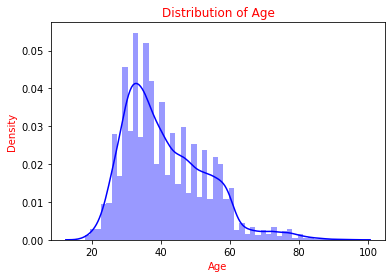

In [19]:
sns.distplot(df.age, color = 'blue')
plt.title('Distribution of Age', color = 'r')
plt.xlabel('Age', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

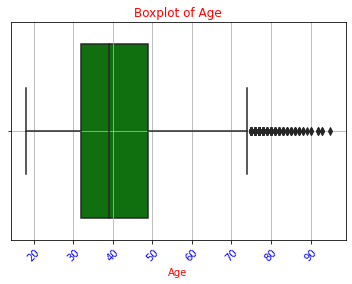

In [20]:
sns.boxplot(df.age, color = 'g')
plt.xlabel('Age', color = 'red')
plt.title('Boxplot of Age', color = 'r')
plt.xticks(rotation = '45', color = 'blue')
plt.grid()
plt.show()

In [21]:
round(df.age.groupby(df.deposit).mean())

deposit
0    41.0
1    42.0
Name: age, dtype: float64

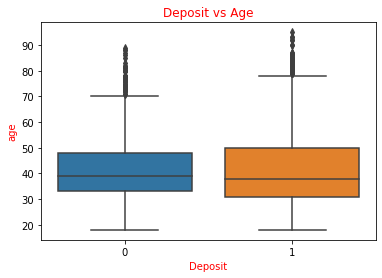

In [22]:
sns.boxplot(x= 'deposit', y = 'age', data = df)
plt.title('Deposit vs Age', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('age', color = 'r')
plt.show()

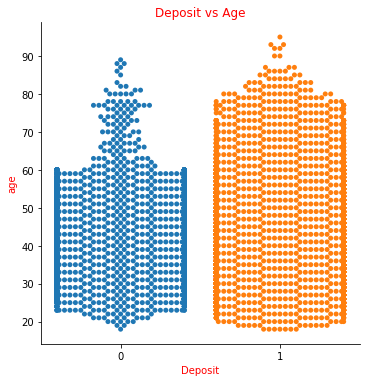

In [23]:
sns.catplot(x= 'deposit', y = 'age', kind = 'swarm', data = df)
plt.title('Deposit vs Age', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('age', color = 'r')
plt.show()

In [24]:
import statsmodels.api as sm

In [25]:
from statsmodels.formula.api import ols
mod = ols('deposit ~ age', data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,3.389733,3.389733,13.610293,0.000226
Residual,11160.0,2779.471493,0.249057,NaN,NaN


* May be Age is a good predictor

### 2. JOB ( Categorical)

In [26]:
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

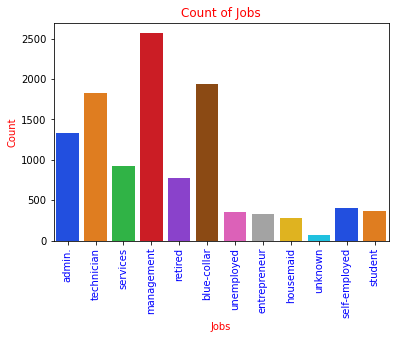

In [27]:
sns.countplot(df.job, palette = 'bright')
plt.title("Count of Jobs",color = 'r')
plt.xlabel('Jobs', color = 'r')
plt.ylabel('Count', color = 'r')
plt.xticks(rotation = 90, color = 'b')
plt.show()

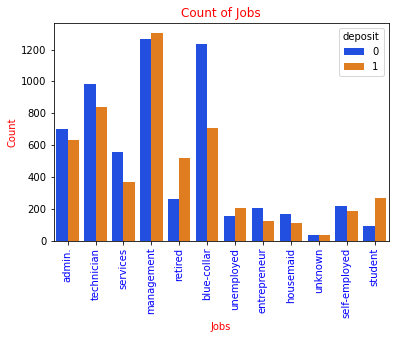

In [28]:
sns.countplot(df.job, hue = df.deposit,palette = 'bright')
plt.title("Count of Jobs",color = 'r')
plt.xlabel('Jobs', color = 'r')
plt.ylabel('Count', color = 'r')
plt.xticks(rotation = 90, color = 'b')
plt.show()

In [29]:
from scipy.stats import chi2, chi2_contingency

In [30]:
cross_tab = pd.crosstab(df.job, df.deposit)
cross_tab

deposit,0,1
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


In [31]:
chi2_contingency(cross_tab, correction=False)

(378.0752558664989,
 2.741689587081072e-74,
 11,
 array([[ 701.89768859,  632.10231141],
        [1022.85540226,  921.14459774],
        [ 172.58054112,  155.41945888],
        [ 144.16789106,  129.83210894],
        [1350.12703817, 1215.87296183],
        [ 409.35262498,  368.64737502],
        [ 213.09487547,  191.90512453],
        [ 485.645852  ,  437.354148  ],
        [ 189.41766708,  170.58233292],
        [ 959.19001971,  863.80998029],
        [ 187.83918653,  169.16081347],
        [  36.83121304,   33.16878696]]))

* May be a Good predictor

### 3. MARITAL ( Categorical)

In [32]:
df.marital.value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

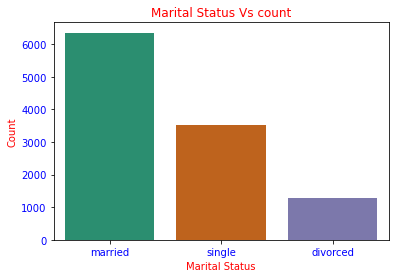

In [33]:
sns.countplot(df.marital, palette = 'Dark2')
plt.title("Marital Status Vs count",color = 'r')
plt.xlabel('Marital Status', color = 'r')
plt.ylabel('Count', color = 'r')
plt.xticks(rotation = 0, color = 'b')
plt.yticks(color = 'b')
plt.show()

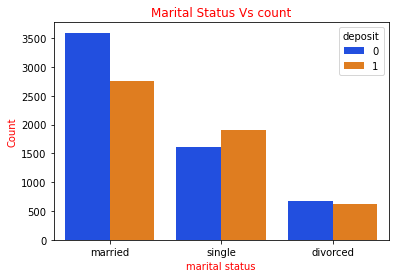

In [34]:
sns.countplot(df.marital, hue = df.deposit,palette = 'bright')
plt.title("Marital Status Vs count",color = 'r')
plt.xlabel('marital status', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [35]:
from scipy.stats import chi2, chi2_contingency

In [36]:
m_crosstab = pd.crosstab(df.marital, df.deposit)
m_crosstab

deposit,0,1
marital,,
divorced,671,622
married,3596,2755
single,1606,1912


In [37]:
chi2_contingency(m_crosstab, correction=False)

(109.58335610012479,
 1.600576988089358e-24,
 2,
 array([[ 680.32512095,  612.67487905],
        [3341.64334349, 3009.35665651],
        [1851.03153557, 1666.96846443]]))

* may be a good predictor

* replacing 
            'divorced' = 0,
            'married' = 1,
            'single' = 2
    

In [38]:
df.marital.replace(to_replace = ['divorced', 'married', 'single'], value = [0,1,2], inplace = True)

In [39]:
df.marital.value_counts()

1    6351
2    3518
0    1293
Name: marital, dtype: int64

### 4. EDUCATION (Categorical)

In [40]:
df.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

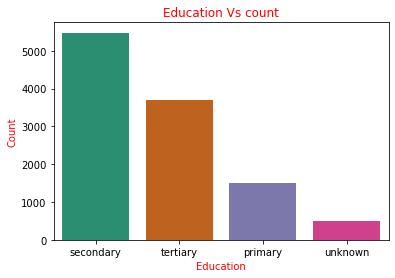

In [41]:
sns.countplot(df.education, palette = 'Dark2')
plt.title("Education Vs count",color = 'r')
plt.xlabel('Education', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

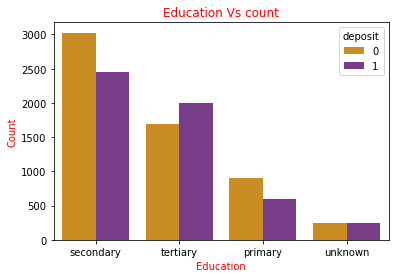

In [42]:
sns.countplot(df.education, hue = df.deposit,palette = 'CMRmap_r')
plt.title("Education Vs count",color = 'r')
plt.xlabel('Education', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [43]:
e_crosstab = pd.crosstab(df.education, df.deposit)
e_crosstab

deposit,0,1
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252


In [44]:
chi2_contingency(e_crosstab, correction=False)

(122.77008967211442,
 1.9534186354212715e-26,
 3,
 array([[ 789.24027952,  710.75972048],
        [2881.25318043, 2594.74681957],
        [1941.00492743, 1747.99507257],
        [ 261.50161261,  235.49838739]]))

* may be a good predictor

In [45]:
df.education.replace(to_replace = ['primary', 'secondary', 'tertiary','unknown'], value = [0,1,2,3], inplace = True)

In [46]:
df.education.value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

### 5. DEFAULT (Categorical)

In [47]:
df.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [48]:
df.default.replace(to_replace = ['no', 'yes'], value = [0,1], inplace = True)

In [49]:
df.default.value_counts()

0    10994
1      168
Name: default, dtype: int64

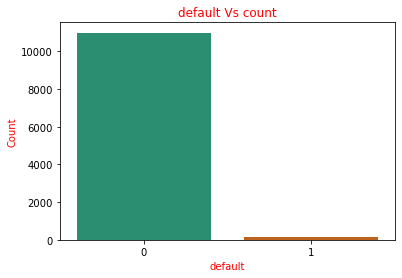

In [50]:
sns.countplot(df.default, palette = 'Dark2')
plt.title("default Vs count",color = 'r')
plt.xlabel('default', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

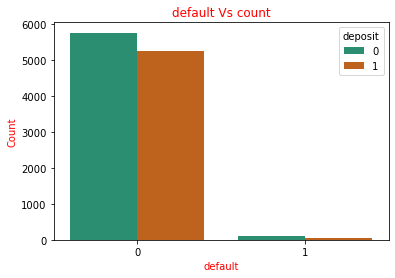

In [51]:
sns.countplot(df.default, hue = df.deposit, palette = 'Dark2')
plt.title("default Vs count",color = 'r')
plt.xlabel('default', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [52]:
def_crosstab = pd.crosstab(df.default, df.deposit)
def_crosstab

deposit,0,1
default,,
0,5757,5237
1,116,52


In [53]:
chi2_contingency(def_crosstab, correction=False)

(18.471653190787777,
 1.7245026564004267e-05,
 1,
 array([[5784.60508869, 5209.39491131],
        [  88.39491131,   79.60508869]]))

* May be A GOOD predictor

### 6. BALANCE (Continous)

In [54]:
df.balance.value_counts().sum()

11162

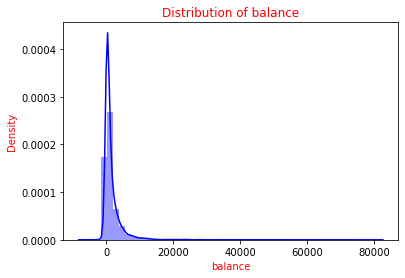

In [55]:
sns.distplot(df.balance, color = 'blue')
plt.title('Distribution of balance', color = 'r')
plt.xlabel('balance', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

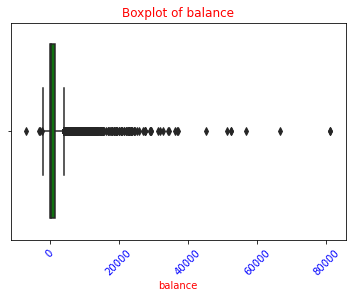

In [56]:
sns.boxplot(df.balance, color = 'g')
plt.xlabel('balance', color = 'red')
plt.title('Boxplot of balance', color = 'r')
plt.xticks(rotation = '45', color = 'blue')
plt.show()

In [57]:
## counting outliers

In [58]:
IQR = df.balance.describe()['75%'] - df.balance.describe()['25%']
up_lim = df.balance.describe()['75%'] + 1.5 * IQR
len(df.balance[df.balance > up_lim])

1051

In [59]:
round(df.balance.groupby(df.deposit).mean())

deposit
0    1280.0
1    1804.0
Name: balance, dtype: float64

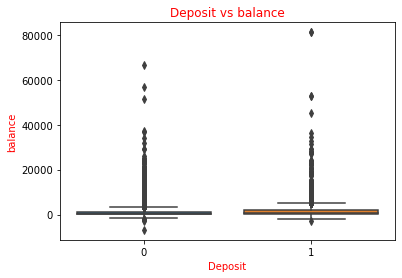

In [60]:
sns.boxplot(x= 'deposit', y = 'balance', data = df)
plt.title('Deposit vs balance', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('balance', color = 'r')
plt.show()

### 7 . HOUSING (Categorical)

In [61]:
df.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [62]:
df.housing.replace(to_replace = ['no', 'yes'], value = [0,1], inplace = True)

In [63]:
df.housing.value_counts()

0    5881
1    5281
Name: housing, dtype: int64

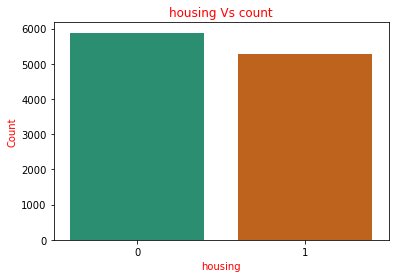

In [64]:
sns.countplot(df.housing, palette = 'Dark2')
plt.title("housing Vs count",color = 'r')
plt.xlabel('housing', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

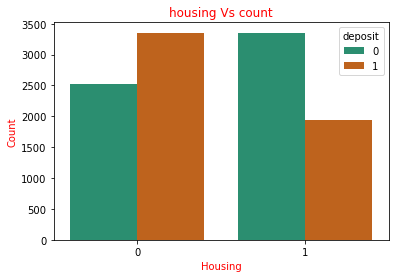

In [65]:
sns.countplot(df.housing, hue = df.deposit, palette = 'Dark2')
plt.title("housing Vs count",color = 'r')
plt.xlabel('Housing', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [66]:
hou_crosstab = pd.crosstab(df.housing, df.deposit)
hou_crosstab

deposit,0,1
housing,,
0,2527,3354
1,3346,1935


In [67]:
chi2_contingency(hou_crosstab, correction = False)

(464.00673235222115,
 6.456025415803168e-103,
 1,
 array([[3094.3480559, 2786.6519441],
        [2778.6519441, 2502.3480559]]))

* May be a good predictor

### 8 . LOAN (Categorical)

In [68]:
df.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [69]:
df.loan.replace(to_replace = ['no', 'yes'], value = [0,1], inplace = True)

In [70]:
df.loan.value_counts()

0    9702
1    1460
Name: loan, dtype: int64

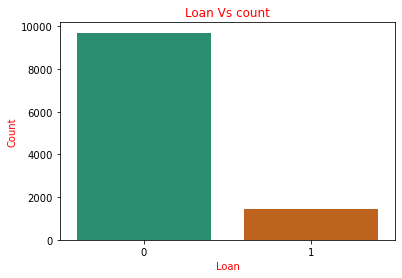

In [71]:
sns.countplot(df.loan, palette = 'Dark2')
plt.title("Loan Vs count",color = 'r')
plt.xlabel('Loan', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

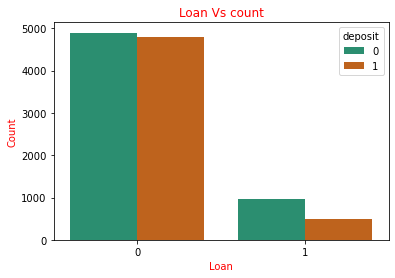

In [72]:
sns.countplot(df.loan,hue = df.deposit, palette = 'Dark2')
plt.title("Loan Vs count",color = 'r')
plt.xlabel('Loan', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [73]:
loan_crosstab = pd.crosstab(df.loan, df.deposit)
loan_crosstab

deposit,0,1
loan,,
0,4897,4805
1,976,484


In [74]:
chi2_contingency(loan_crosstab, correction = False)

(136.48818574538302,
 1.5603927824496013e-31,
 1,
 array([[5104.80612793, 4597.19387207],
        [ 768.19387207,  691.80612793]]))

* may be a good predictor

### 9. CONTACT (Categorical)

In [75]:
df.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

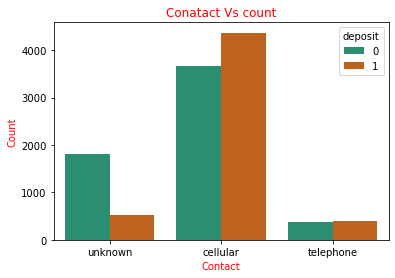

In [76]:
sns.countplot(df.contact,hue = df.deposit, palette = 'Dark2')
plt.title("Conatact Vs count",color = 'r')
plt.xlabel('Contact', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [77]:
con_crosstab = pd.crosstab(df.contact, df.deposit)
con_crosstab

deposit,0,1
contact,,
cellular,3673,4369
telephone,384,390
unknown,1816,530


In [78]:
chi2_contingency(con_crosstab, correction = False)

(736.6866796046972,
 1.0728032438445805e-160,
 2,
 array([[4231.3802186 , 3810.6197814 ],
        [ 407.24798423,  366.75201577],
        [1234.37179717, 1111.62820283]]))

In [79]:
df.contact.replace(to_replace = ['cellular','telephone', 'unknown'], value = [0,1,2], inplace = True)

In [80]:
df.contact.value_counts()

0    8042
2    2346
1     774
Name: contact, dtype: int64

### 10 . DAY (Continous)

In [81]:
df.day.value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
1     122
24    122
Name: day, dtype: int64

Text(0.5, 1.0, 'Distribution of Days')

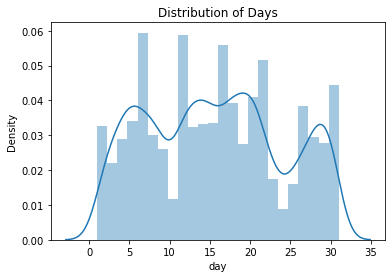

In [82]:
sns.distplot(df.day)
plt.title('Distribution of Days')

<AxesSubplot:xlabel='day'>

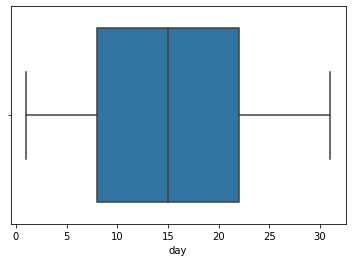

In [83]:
sns.boxplot(df.day)

In [84]:
from statsmodels.formula.api import ols
mod = ols('deposit ~ day', data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
day,1.0,8.828906,8.828906,35.518905,2.602203e-09
Residual,11160.0,2774.032320,0.248569,NaN,NaN


* may be a good predictor

### 11. MONTH (Cat)

In [85]:
df.month.value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

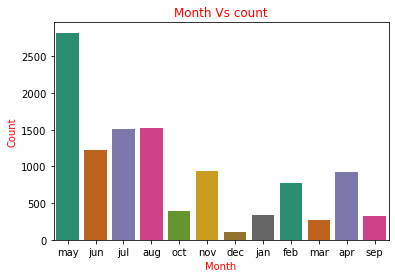

In [86]:
sns.countplot(df.month, palette = 'Dark2')
plt.title("Month Vs count",color = 'r')
plt.xlabel('Month', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

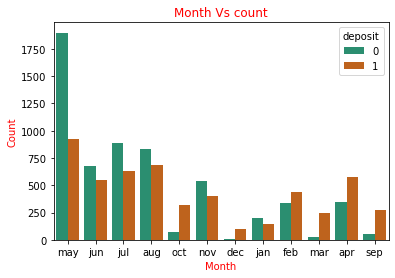

In [87]:
sns.countplot(df.month,hue = df.deposit, palette = 'Dark2')
plt.title("Month Vs count",color = 'r')
plt.xlabel('Month', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [88]:
mon_crosstab = pd.crosstab(df.month, df.deposit)
mon_crosstab

deposit,0,1
month,,
apr,346,577
aug,831,688
dec,10,100
feb,335,441
jan,202,142
jul,887,627
jun,676,546
mar,28,248
may,1899,925


In [89]:
chi2_contingency(mon_crosstab, correction = False)

(1046.7745027840656,
 1.6420829584486923e-217,
 11,
 array([[ 485.645852  ,  437.354148  ],
        [ 799.23732306,  719.76267694],
        [  57.8776205 ,   52.1223795 ],
        [ 408.3003046 ,  367.6996954 ],
        [ 180.9991041 ,  163.0008959 ],
        [ 796.60652213,  717.39347787],
        [ 642.96774772,  579.03225228],
        [ 145.22021143,  130.77978857],
        [1485.87636624, 1338.12363376],
        [ 496.16905572,  446.83094428],
        [ 206.25479305,  185.74520695],
        [ 167.84509944,  151.15490056]]))

* may be a good predictor

### 12. DURATION (Continous)

In [90]:
df.duration.value_counts().sum()

11162

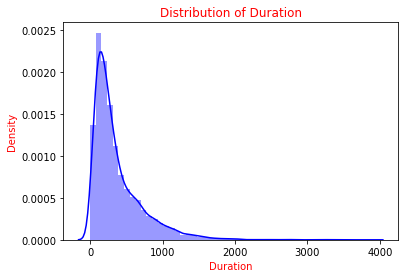

In [91]:
sns.distplot(df.duration, color = 'blue')
plt.title('Distribution of Duration', color = 'r')
plt.xlabel('Duration', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

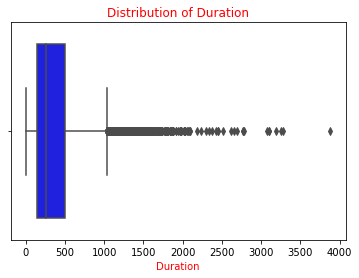

In [92]:
sns.boxplot(df.duration, color = 'blue')
plt.title('Distribution of Duration', color = 'r')
plt.xlabel('Duration', color = 'r')
plt.show()

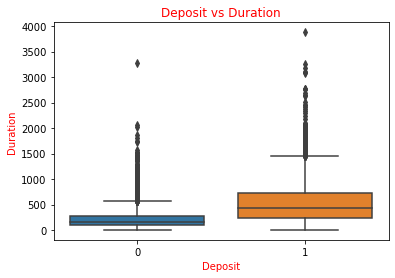

In [93]:
sns.boxplot(x= 'deposit', y = 'duration', data = df)
plt.title('Deposit vs Duration', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('Duration', color = 'r')
plt.show()

In [94]:
from statsmodels.formula.api import ols
mod = ols('deposit ~ duration', data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
duration,1.0,568.346833,568.346833,2864.172247,0.0
Residual,11160.0,2214.514392,0.198433,NaN,NaN


* May be a good Predictor

### 13. CAMPAIGN (Continous)

In [95]:
df.campaign.value_counts().sum()

11162

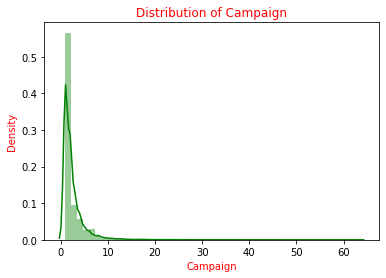

In [96]:
sns.distplot(df.campaign, color = 'g')
plt.title('Distribution of Campaign', color = 'r')
plt.xlabel('Campaign', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

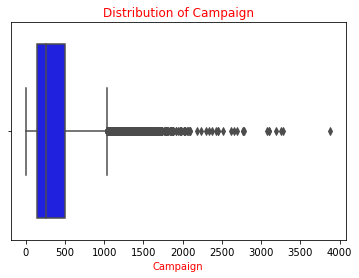

In [97]:
sns.boxplot(df.duration, color = 'blue')
plt.title('Distribution of Campaign', color = 'r')
plt.xlabel('Campaign', color = 'r')
plt.show()

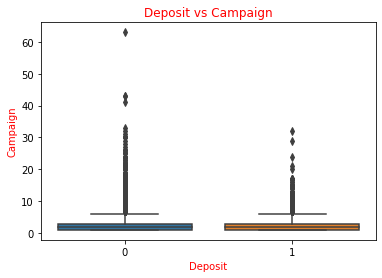

In [98]:
sns.boxplot(x= 'deposit', y = 'campaign', data = df)
plt.title('Deposit vs Campaign', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('Campaign', color = 'r')
plt.show()

In [99]:
from statsmodels.formula.api import ols
mod = ols('deposit ~ campaign', data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
campaign,1.0,45.652012,45.652012,186.129893,4.831324e-42
Residual,11160.0,2737.209213,0.245270,NaN,NaN


### 14. P days (Cont)

In [100]:
df.pdays.shape

(11162,)

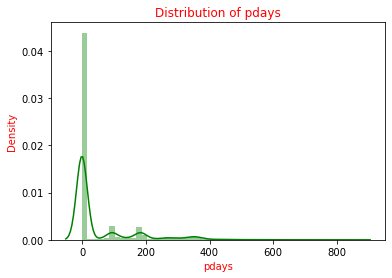

In [101]:
sns.distplot(df.pdays, color = 'g')
plt.title('Distribution of pdays', color = 'r')
plt.xlabel('pdays', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

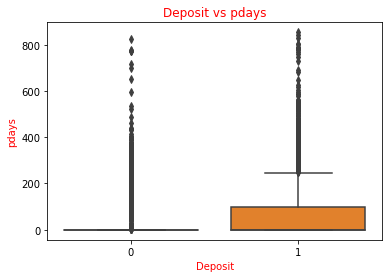

In [102]:
sns.boxplot(x= 'deposit', y = 'pdays', data = df)
plt.title('Deposit vs pdays', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('pdays', color = 'r')
plt.show()

In [103]:
from statsmodels.formula.api import ols
mod = ols('deposit ~ pdays', data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
pdays,1.0,63.950961,63.950961,262.492195,2.271607e-58
Residual,11160.0,2718.910265,0.243630,NaN,NaN


### 15. PREVIOUS (CONT)

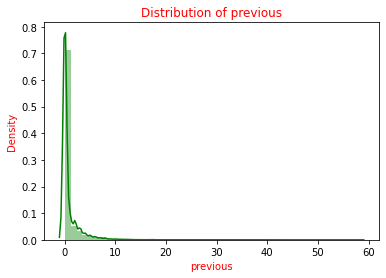

In [104]:
sns.distplot(df.previous, color = 'g')
plt.title('Distribution of previous', color = 'r')
plt.xlabel('previous', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

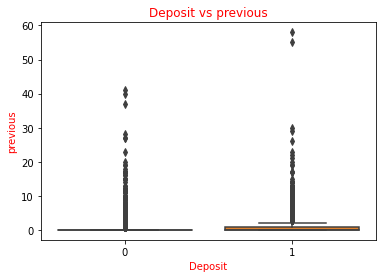

In [105]:
sns.boxplot(x= 'deposit', y = 'previous', data = df)
plt.title('Deposit vs previous', color = 'r')
plt.xlabel('Deposit', color ='r')
plt.ylabel('previous', color = 'r')
plt.show()

In [106]:
from statsmodels.formula.api import ols
mod = ols('deposit ~ previous', data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
previous,1.0,54.440588,54.440588,222.677159,7.125338e-50
Residual,11160.0,2728.420638,0.244482,NaN,NaN


* May be a good predictor

### 16. P OUTCOME(Cat)

In [107]:
df.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [108]:
df.poutcome.replace(to_replace = ['failure','other', 'success', 'unknown'], value = [0,1,2,3], inplace = True)

In [109]:
df.poutcome.value_counts()

3    8326
0    1228
2    1071
1     537
Name: poutcome, dtype: int64

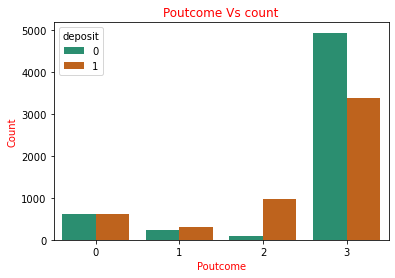

In [110]:
sns.countplot(df.poutcome,hue = df.deposit, palette = 'Dark2')
plt.title("Poutcome Vs count",color = 'r')
plt.xlabel('Poutcome', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [111]:
pot_crosstab = pd.crosstab(df.poutcome, df.deposit)
pot_crosstab

deposit,0,1
poutcome,,
0,610,618
1,230,307
2,93,978
3,4940,3386


In [112]:
chi2_contingency(pot_crosstab, correction = False)

(1004.635780185333,
 1.7761850102620281e-217,
 3,
 array([[ 646.12470883,  581.87529117],
        [ 282.54802007,  254.45197993],
        [ 563.51755958,  507.48244042],
        [4380.80971152, 3945.19028848]]))

* May be a good predictor

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [8]:
hm = df.loc[:,['age','balance','day','duration','campaign','pdays','previous']]

In [9]:
print(hm.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000


Text(0.5, 1.0, 'correlation matrix')

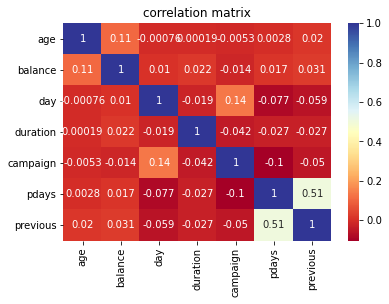

In [10]:
sns.heatmap(hm.corr(), cmap = 'RdYlBu', annot = True)
plt.title('correlation matrix')

## Creating Dummy Variables

In [12]:
cat_vars = ['job', 'marital', 'education', 'default','housing','loan','contact','month','poutcome']

In [13]:
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(df[var], prefix = var)
    data = df.join(cat_list)
    df = data

In [14]:
cat_vars = ['job', 'marital', 'education', 'default','housing','loan','contact','month','poutcome']
df_vars = df.columns.values.tolist()
to_keep = [i for i in df_vars if i not in cat_vars]

In [15]:
df_final = df[to_keep]
df_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
  

## Dropping Original Variables

In [16]:
df.drop(columns = ['job', 'marital', 'education', 'default','housing','loan','contact','month','poutcome'], axis = 1, inplace = True)

In [17]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [18]:
import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

In [19]:
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Over Sampling using SMOTE (Synthetic Minority Oversampling Technique)

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
x = df_final.loc[:, df_final.columns != 'deposit']
y = df_final.loc[:, df_final.columns == 'deposit']
os = SMOTE(random_state = 0)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [23]:
columns = x_train.columns

In [27]:
os_data_x,os_data_y=os.fit_resample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['deposit'])


In [28]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['deposit']==0]))
print("Number of subscription",len(os_data_y[os_data_y['deposit']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['deposit']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['deposit']==1])/len(os_data_x))

length of oversampled data is  8162
Number of no subscription in oversampled data 4081
Number of subscription 4081
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [29]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [30]:
not_default = df[df.deposit==0]
len(not_default)

5873

In [31]:
default = df[df.deposit==1]
len(not_default)

5873

In [32]:
default_unsampled1 = resample(default,
                             replace = True,
                             n_samples = len(not_default),
                             random_state=0)

In [33]:
unsampled1 = pd.concat([not_default, default_unsampled1])
unsampled1.deposit.value_counts()

0    5873
1    5873
Name: deposit, dtype: int64

### Feauture Selection

In [37]:
df_final_vars=df_final.columns.values.tolist()
y=['deposit']
x=[i for i in df_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
  True False False False False False False  True  True  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True False  True  True  True  True False  True  True False False  True
  True  True  True]
[23 27 24 21 16 26 19 22 20 13  6 12  1  9 14  2 18  7  8  1  1  1  1  1
  1  1 11 10 25  3  1  1  1  1  1  1  1 15  1  1  1  1  4  1  1 17  5  1
  1  1  1]


In [38]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [40]:
os_data_y['deposit']

0       1
1       1
2       1
3       0
4       0
       ..
8157    1
8158    1
8159    1
8160    1
8161    1
Name: deposit, Length: 8162, dtype: int64

In [41]:
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','job_admin.', 
        'job_blue-collar', 'job_entrepreneur','job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']
x = os_data_x[cols]
y = os_data_y['deposit']

In [42]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.388677
         Iterations 14
                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.439    
Dependent Variable:    deposit           AIC:               6446.7563
Date:                  2022-02-05 14:23  BIC:               6804.1258
No. Observations:      8162              Log-Likelihood:    -3172.4  
Df Model:              50                LL-Null:           -5657.5  
Df Residuals:          8111              LLR p-value:       0.0000   
Converged:             1.0000            Scale:             1.0000   
No. Iterations:        14.0000                                       
---------------------------------------------------------------------
                     Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
age                   0.0025   0.0038  0.6592 0.5098  -0.0050  0.0100
balance        

* The p-values for most of the variables are smaller than 0.05, except some variables, therefore, we will remove them.
* they are age, day, pdays, previous, marital_divorced,marital_married, marital_single, housing_yes, loan_no,loan_yes,month_dec,
* month_jun,month_oct,month_sep,poutcome_failure, poutcome_other, poutcome_unknown

In [83]:
cols = ['balance', 'duration', 'campaign','job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
     'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov',
        'poutcome_success']
x = os_data_x[cols]
y = os_data_y['deposit']

In [84]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.395818
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.429    
Dependent Variable:   deposit           AIC:               6529.3320
Date:                 2022-02-05 15:34  BIC:               6767.5783
No. Observations:     8162              Log-Likelihood:    -3230.7  
Df Model:             33                LL-Null:           -5657.5  
Df Residuals:         8128              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance              0.0000   0.0000   3.7367 0.0002  0.0000  0.0001
duration             0.0055

* again we will drop columns which have p values > 0.05 , they are contact_cellular , contact_telephone, contact_unknown

In [85]:
cols = ['balance', 'duration', 'campaign','job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
         'month_apr', 'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov',
        'poutcome_success']
x = os_data_x[cols]
y = os_data_y['deposit']

In [86]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.418271
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.397    
Dependent Variable:   deposit           AIC:               6889.8567
Date:                 2022-02-05 15:37  BIC:               7107.0813
No. Observations:     8162              Log-Likelihood:    -3413.9  
Df Model:             30                LL-Null:           -5657.5  
Df Residuals:         8131              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance              0.0000   0.0000   4.3912 0.0000  0.0000  0.0001
duration             0.0054

* We will drop month_apr

In [87]:
cols = ['balance', 'duration', 'campaign','job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
          'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov',
        'poutcome_success']
x = os_data_x[cols]
y = os_data_y['deposit']

In [88]:
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.418279
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.397    
Dependent Variable:   deposit           AIC:               6887.9855
Date:                 2022-02-05 15:39  BIC:               7098.2028
No. Observations:     8162              Log-Likelihood:    -3414.0  
Df Model:             29                LL-Null:           -5657.5  
Df Residuals:         8132              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
balance              0.0000   0.0000   4.3896 0.0000  0.0000  0.0001
duration             0.0054

## MODEL 1 ( using 'liblinear' solver[default])

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [90]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1065  206]
 [ 248  930]]


In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1271
           1       0.82      0.79      0.80      1178

    accuracy                           0.81      2449
   macro avg       0.81      0.81      0.81      2449
weighted avg       0.81      0.81      0.81      2449



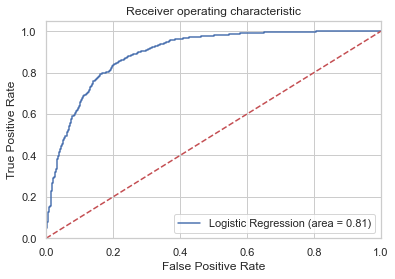

In [93]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### MODEL 2 : Using Newtons - cg solver

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'newton-cg', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='newton-cg')

In [95]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier using newton-cg solver  on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier using newton-cg solver  on test set: 0.81


In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1059  212]
 [ 245  933]]


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1271
           1       0.81      0.79      0.80      1178

    accuracy                           0.81      2449
   macro avg       0.81      0.81      0.81      2449
weighted avg       0.81      0.81      0.81      2449



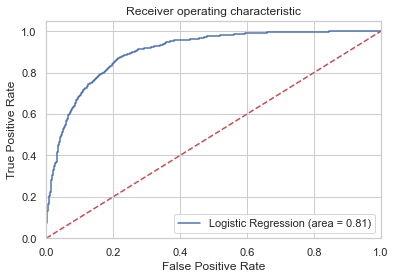

In [99]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 3 (using 'saga' solver)

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'saga', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='saga')

In [101]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier using saga solver on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier using saga solver on test set: 0.50


In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix\n',confusion_matrix)

confusion matrix
 [[  70 1201]
 [  25 1153]]


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.06      0.10      1271
           1       0.49      0.98      0.65      1178

    accuracy                           0.50      2449
   macro avg       0.61      0.52      0.38      2449
weighted avg       0.62      0.50      0.37      2449



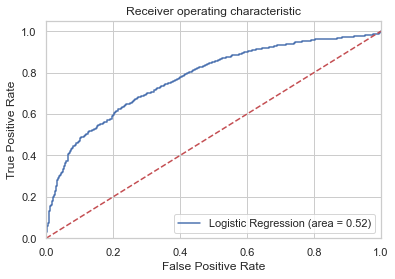

In [104]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 4. (using 'sag' solver)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver = 'sag', random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='sag')

In [106]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier using sag solver on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier using sag solver on test set: 0.50


In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix\n',confusion_matrix)

confusion matrix
 [[  71 1200]
 [  25 1153]]


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.06      0.10      1271
           1       0.49      0.98      0.65      1178

    accuracy                           0.50      2449
   macro avg       0.61      0.52      0.38      2449
weighted avg       0.62      0.50      0.37      2449



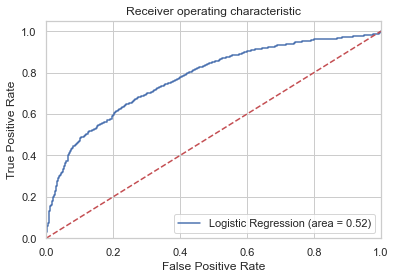

In [109]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

* Conclusion

### So the winner model is model 1 using liblinear solver